In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

2023-10-12 17:58:13.823500: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
## set gpu
gpu = 1
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu}" 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


2023-10-12 17:58:14.687480: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-12 17:58:14.688146: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-10-12 17:58:14.712809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.935GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2023-10-12 17:58:14.712848: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-10-12 17:58:14.715417: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-10-12 17:58:14.715493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "" 

physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


# Load model

In [3]:
model_dir ='/media/HDD/rheology2023/EffNetB7Model/Classification/Blood_Viscosity/_3classes/fold1/R2/models/EffNetB7_3Class_fold1_R2.h5' 
model = load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)

2023-10-12 17:58:15.569114: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 17:58:15.570184: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-12 17:58:15.572259: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.935GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2023-10-12 17:58:15.572342: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-10-12 17:58:15.572387: I tensorflow/stream_executor/platform/default/dso_loader

600 600


In [4]:
model.summary()

Model: "EffNetModel_Blood"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 300, 300, 64) 1728        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 300, 300, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 300, 300, 64) 0           stem_bn[0][0]                    
__________________________________________________________________________________

## Select Data

- fold1-3

In [5]:
fold = 1

In [6]:
df_2dFFT = pd.read_csv("/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-3channels-3Fold-split3class.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {2, 3}
(192, 14)
Fold Test set {1}
(96, 14)


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary
0,0,0,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
1,1,1,269,269,HN38_D0_30HZ_20XINF_UWELL_25660223_145353_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_145353,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
2,2,2,240,240,HN35_D0_30HZ_20XINF_UWELL_25660131_163058_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_163058,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
3,3,3,265,265,HN38_D0_30HZ_20XINF_UWELL_25660223_144217_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144217,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
4,4,4,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (height, width)
BATCH_SIZE = 16

### Get data Loder
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=20,
                    brightness_range=[0.5, 1.5],
                    shear_range=0.5,
                    horizontal_flip = False,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_2dFFT,
        directory = None,
        x_col = 'image_path',
        y_col = 'subclass',
        target_size = (height, width),
        batch_size=BATCH_SIZE,
        color_mode= 'rgb',
        class_mode='categorical')


#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 192 validated image filenames belonging to 3 classes.
{0: 'No_Splenectomy', 1: 'Normal', 2: 'Splenectomy'}


## Prediction

In [8]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

In [9]:
#Predict
pred_list = list()
prob_list = list()
img_path=test_2dFFT['image_path'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

2023-10-12 17:58:33.476941: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-10-12 17:58:33.496670: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz
2023-10-12 17:58:36.171349: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-10-12 17:58:36.661320: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-10-12 17:58:36.666720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2023-10-12 17:58:38.307923: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-10-12 17:58:38.418620: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform 

In [10]:
predict

array([9.9969947e-01, 2.0174308e-04, 9.8775854e-05], dtype=float32)

In [11]:
print(len(pred_list))
print(len(prob_list))

test_2dFFT['category'] = pred_list
test_2dFFT['Prob'] = prob_list
test_2dFFT.head()

96
96


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,category,Prob
0,0,0,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.950851
1,1,1,269,269,HN38_D0_30HZ_20XINF_UWELL_25660223_145353_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_145353,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.998534
2,2,2,240,240,HN35_D0_30HZ_20XINF_UWELL_25660131_163058_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_163058,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.999489
3,3,3,265,265,HN38_D0_30HZ_20XINF_UWELL_25660223_144217_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144217,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.999806
4,4,4,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.999299


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['subclass'].array
pred = test_2dFFT['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 39.583333333333336%
                precision    recall  f1-score   support

No_Splenectomy       0.47      0.47      0.47        32
        Normal       0.61      0.59      0.60        32
   Splenectomy       0.12      0.12      0.12        32

      accuracy                           0.40        96
     macro avg       0.40      0.40      0.40        96
  weighted avg       0.40      0.40      0.40        96



### Confusion matrix

Text(0.5, 20.046874999999993, 'Predicted label')

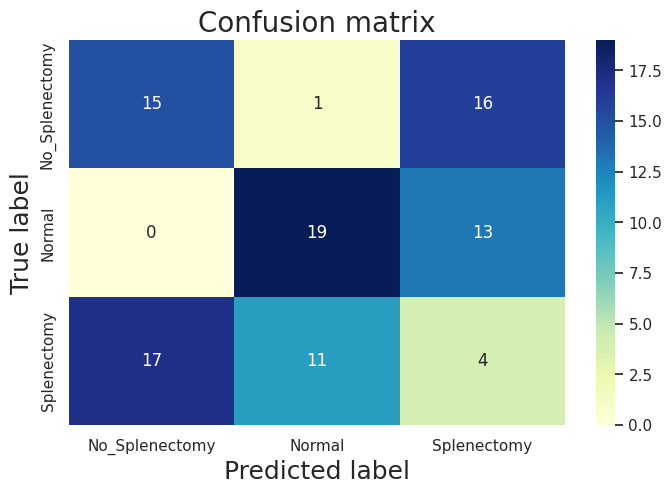

In [13]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## Evaluation 2 Classes

- HN ==> No_Splenectomy, Splenectomy

- NBL ==> Normal


In [14]:
## 1. Create Code Label
dict_code = {'No_Splenectomy': 'HN', 'Splenectomy': 'HN', 'Normal': 'NBL'}
print(dict_code)

## 2. Map fold
test_2dFFT["re_category"]= test_2dFFT['category'].map(dict_code)
print(test_2dFFT.shape)
test_2dFFT.head()

{'No_Splenectomy': 'HN', 'Splenectomy': 'HN', 'Normal': 'NBL'}
(96, 17)


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,category,Prob,re_category
0,0,0,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.950851,HN
1,1,1,269,269,HN38_D0_30HZ_20XINF_UWELL_25660223_145353_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_145353,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.998534,HN
2,2,2,240,240,HN35_D0_30HZ_20XINF_UWELL_25660131_163058_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN35_D0_30HZ_20XINF_UWELL_25660131_163058,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,No_Splenectomy,0.999489,HN
3,3,3,265,265,HN38_D0_30HZ_20XINF_UWELL_25660223_144217_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144217,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.999806,HN
4,4,4,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1,Splenectomy,0.999299,HN


In [15]:
test_2dFFT['re_category'].isnull().sum()

0

In [16]:
classes = set(test_2dFFT["re_category"])
print(f"Classes ==> {list(classes)}")

Classes ==> ['NBL', 'HN']


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['classes'].array
pred = test_2dFFT['re_category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 73.95833333333333%
              precision    recall  f1-score   support

          HN       0.80      0.81      0.81        64
         NBL       0.61      0.59      0.60        32

    accuracy                           0.74        96
   macro avg       0.71      0.70      0.70        96
weighted avg       0.74      0.74      0.74        96



Text(0.5, 21.249999999999993, 'Predicted label')

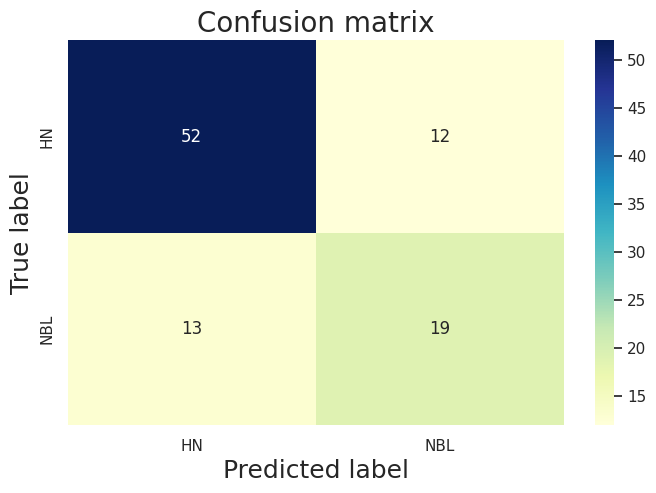

In [18]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)